In [1]:
"""
Author: John Lipor, Phillip Kearns
LMRC demo - syntheticTest
python version: 3.7.3
"""
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn, rand
from numpy.linalg import norm 
from scipy.io import loadmat
from sIRLSp import sIRLSp
import time

In [12]:
## Load cameraman data
data = loadmat("cameraman.mat")
X = data['X']
N, D = X.shape 

sampProb = 0.4
mask = rand(N,D) < sampProb
camera = np.multiply(X,mask)    # observed data

# Whether to recalculate completion and save 
# or load already calculated matrix
recalculate = False
saveMat     = True

if recalculate:
    # Run sIRLSp algorithm
    p = 1 # tuning parameter
    start = time.time()
    camera_r = sIRLSp(camera,mask,p)
    print(f"Time: {time.time() - start}")
    if saveMat:
        np.save('cameramanComplete_p1',camera_r)
else:
    camera_r = np.load('cameramanComplete_p1.npy')
err = norm(camera_r-X,ord='fro')/norm(X,ord='fro')
print(f"Estimated error: {err}")

Estimated error: 0.1416440819688001


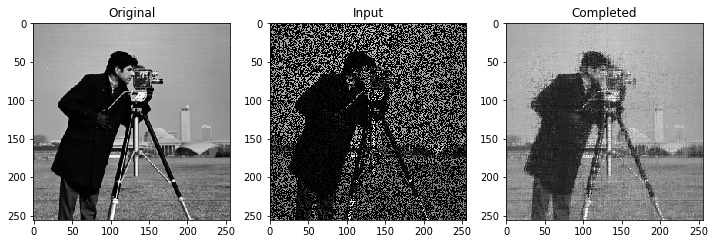

In [13]:
plt.figure(figsize=(12,4))
# Plot the original image
plt.subplot(131)
plt.imshow(X)
plt.title('Original')
plt.set_cmap('gray');

# Plot the masked (low rank) matrix
plt.subplot(132)
plt.imshow(camera)
plt.title('Input')
plt.set_cmap('gray');

# Plot the completed matrix
plt.subplot(133)
plt.imshow(np.real(camera_r))
plt.title('Completed')
plt.set_cmap('gray');

In [6]:
data = loadmat("mandrill.mat")
X = data['X']
N, D = X.shape 
mask = rand(N,D) < sampProb
mandrill = np.multiply(X,mask)    # observed data

# Whether to recalculate completion and save 
# or load already calculated matrix
recalculate = False
saveMat     = True

if recalculate:
    # Run sIRLSp algorithm
    p = 1 # tuning parameter
    start = time.time()
    mandrill_r = sIRLSp(mandrill,mask,p)
    print(f"Time: {time.time() - start}")
    if saveMat:
        np.save('mandrillComplete_p1',camera_r)
else:
    mandrill_r = np.load('mandrillComplete_p1.npy')
err = norm(mandrill_r-X,ord='fro')/norm(X,ord='fro')
print(f"Estimated error: {err}")

Time: 600.3148953914642
Estimated error: 0.26023268748855066


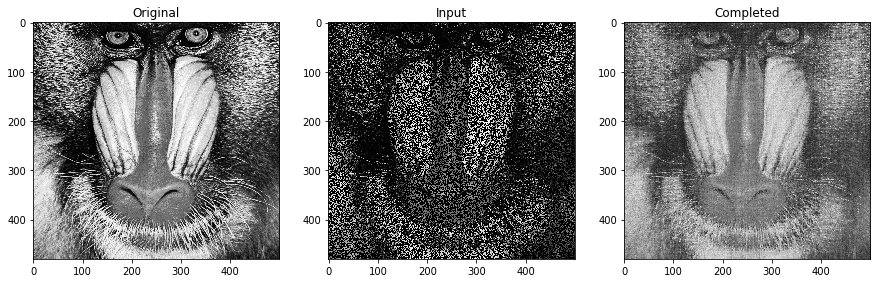

In [8]:
plt.figure(figsize=(15,5))
# Plot the original image
plt.subplot(131)
plt.imshow(X)
plt.title('Original')
plt.set_cmap('gray');

# Plot the masked (low rank) matrix
plt.subplot(132)
plt.imshow(mandrill)
plt.title('Input')
plt.set_cmap('gray');

# Plot the completed matrix
plt.subplot(133)
plt.imshow(np.real(mandrill_r))
plt.title('Completed')
plt.set_cmap('gray');